In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cooccurrence import *
from glob import glob
from time import time
import helper
import sys
import networkx as nx
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

	are,feel,not,right,sents,some,this,will
are	0   0   0   0   6   0   1   0  
feel	0   0   1   1   1   1   0   1  
not	0   1   0   1   1   1   0   1  
right	0   1   1   0   1   1   0   1  
sents	6   1   1   1   4   1   1   1  
some	0   1   1   1   1   0   0   1  
this	1   0   0   0   1   0   0   0  
will	0   1   1   1   1   1   0   0  



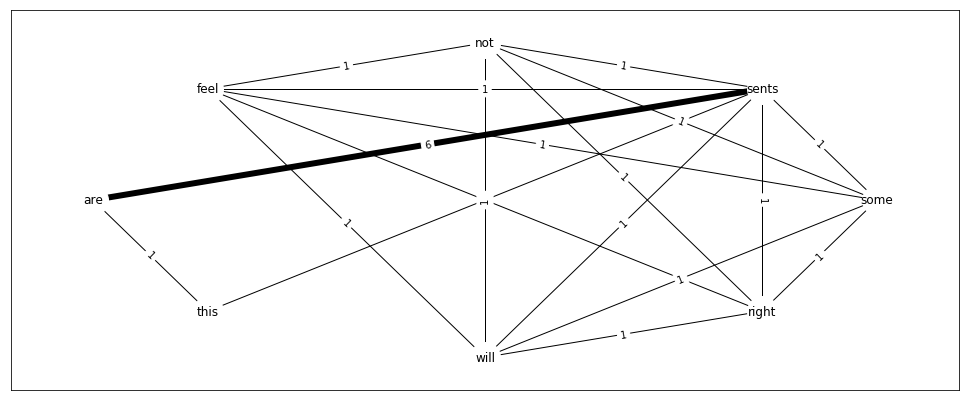

In [3]:
text = 'This are sents. sents are sents sents. Some sents will not feel right. sents are sents.'
# http://www.nltk.org/howto/collocations.html

word2id, id2word, mat = get_coocurrence_matrix(text, window_size = 5, only_forward_window = False, ignore_sentence_bounds = False)
print_cooccurrence_matrix(id2word, mat)
print()
fig, ax = plt.subplots(1, 1, figsize = (17, 7))
plot_cooccurrence_matrix(id2word, mat, ax = ax)
plt.show()

In [34]:
def process(filename, text, **kwargs):
    return (filename, get_coocurrence_matrix(text, **kwargs))

def get_cooccurrence_mats(files, **kwargs):
    file_data = []
    for file in files:
        with open(file) as f:
            file_data.append((file, f.read()))
    mats = Parallel(n_jobs=4)(delayed(process)(*d, **kwargs) for d in file_data)
    return mats

In [55]:
TEXT_DIR = 'extract-concept-graphs/code/data/ng20-single/'
WINDOW_SIZE = 3

times = []
files = glob(TEXT_DIR + '*/*/*.txt')

files = files[:1000]

start = time()
mats = get_cooccurrence_mats(files, window_size = WINDOW_SIZE, only_forward_window = False, ignore_sentence_bounds = False)
print('Time needed: {:.1f}s for {} elements'.format(time() - start, len(files)))

(total) Time needed: 25.6s for 1000 elements


In [58]:
import collections
q = collections.deque(maxlen = WINDOW_SIZE)
for i in range(WINDOW_SIZE + 10):
    q.append(i)
for i in q:
    print(i)

10
11
12
